# **Linear Regression using Sklearn**


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


https://seaborn.pydata.org/tutorial.html

### **TRAINING DATA PRE-PROCESSING**
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.   

As such, data pre-processing addresses:
- Assumptions about data shape
- Incorrect data types
- Outliers or errors
- Missing values
- Categorical variables

In [6]:
full_data = pd.read_csv('./dataset/USA_Housing.csv')

**Data Shape**  
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.  

In [7]:
# Data shape
print('train data:',full_data.shape)

train data: (5000, 7)


In [8]:
# View first few rows
full_data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Missing Data**  
 A heatmap will help better visualize what features as missing the most information.

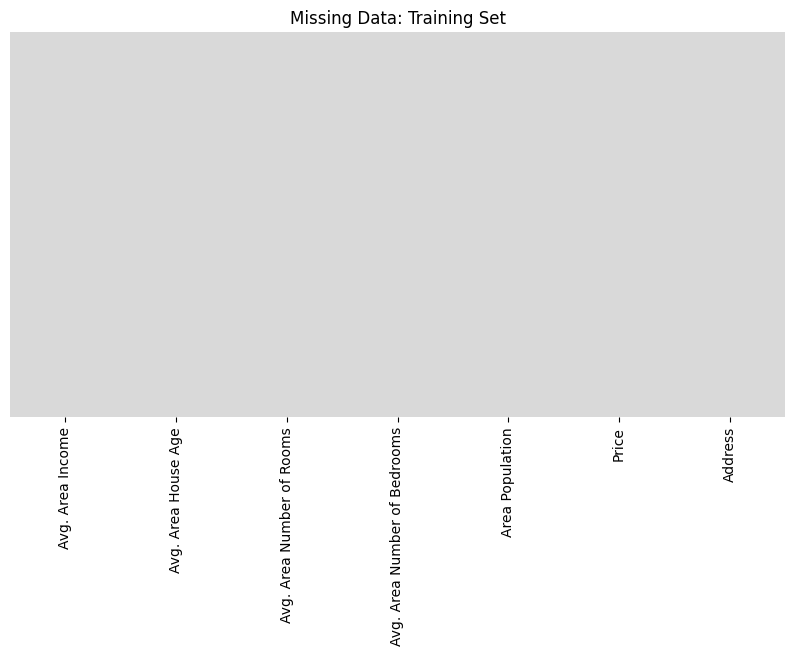

In [10]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [11]:
# Remove Address feature
full_data.drop('Address', axis = 1, inplace = True)

In [12]:
# Remove rows with missing data
full_data.dropna(inplace = True)

In [13]:
full_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


**Numeric Features**

In [14]:
# Numeric summary
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### **GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [15]:
# Shape of train data
full_data.shape

(5000, 6)


>Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric
- everything is concatenated together

## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [17]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Price', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = full_data['Price'] # y is the column we're trying to predict


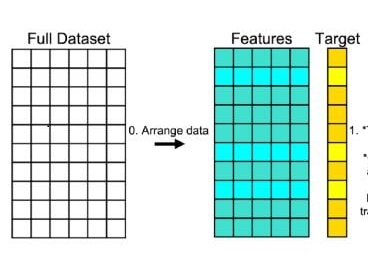

In [18]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [18]:
# pipe = make_pipeline(StandardScaler(), LogisticRegression())
# pipe.fit(X_train, y_train)

In [19]:
# x Represents the Features
x_transform.shape
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [20]:
y # y represents the Target
y.shape

(5000,)

In [22]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 42)

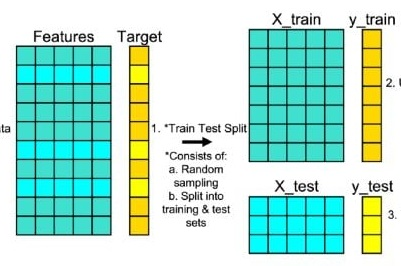

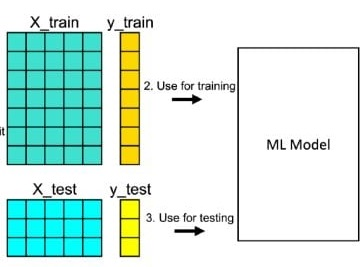

# **LINEAR REGRESSION**

## **Model Training**

In [23]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

## **Model Testing**

## **Class prediction**

In [24]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(500,)
[1308974.61032607 1237616.08059042 1244388.42194096 1230101.05996496
 1061072.3371781  1543431.49363646 1096022.80756645  833570.17046967
  789533.95400673 1469428.54560218  671507.62595619 1604959.00593819
 1004968.50945306 1799335.91199229 1287734.54787416 1088689.98577203
 1423745.58270444 1077816.43247698  802563.98973294  930650.12633553
 1134427.91072657  915905.11866946 1489100.86127095 1285162.01577584
 1581723.66398579 1132865.81367053 1090651.44049938  974726.39455222
  925263.95378534 1740223.81329842 1287620.25286483 1621720.6782438
 1435666.53097631 1234554.0585816  1485892.57840726 1716902.47445772
 1537666.08237544  778311.07858791 1764624.4747707  1175792.85133883
 1553020.0031988   897769.32070821 1372249.62089572  845289.9890355
 1201057.73721213 1132618.25733468 1364337.63208628 1450743.58153003
 1574465.50883139 1233409.13462391 1484846.38741968 1296122.97060912
 1225213.10262977  988698.29373909 1694187.85803186 1823299.74390437
 1136921.26210616 1283110.812

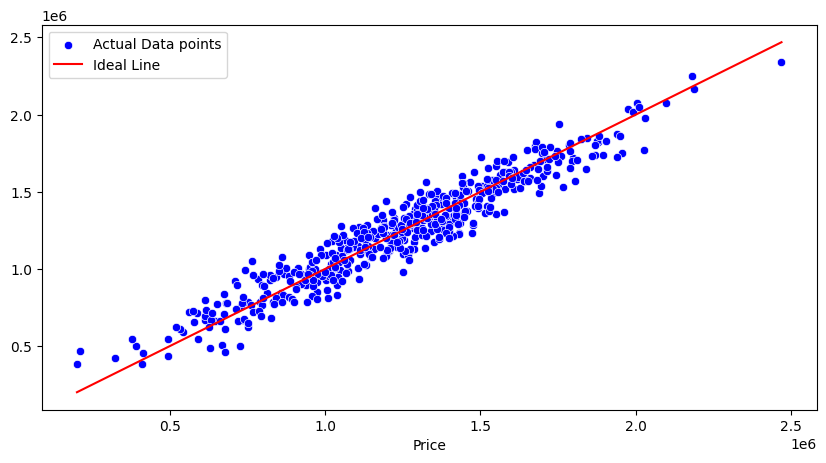

In [25]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [26]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
    1339096.08 |    1308974.61
    1251794.18 |    1237616.08
    1340094.97 |    1244388.42
    1431507.62 |    1230101.06
    1042373.52 |    1061072.34
    1555320.50 |    1543431.49
    1250882.29 |    1096022.81
    1039380.72 |     833570.17
     832475.19 |     789533.95
    1420648.28 |    1469428.55
     613788.32 |     671507.63
    1702406.04 |    1604959.01
     913587.10 |    1004968.51
    1675557.27 |    1799335.91
    1279160.99 |    1287734.55
     949684.41 |    1088689.99
    1372994.29 |    1423745.58
    1148563.90 |    1077816.43
     846939.43 |     802563.99
    1002192.58 |     930650.13
    1072253.83 |    1134427.91
     973197.78 |     915905.12
    1538985.19 |    1489100.86
    1135079.35 |    1285162.02
    1618721.14 |    1581723.66
    1158742.83 |    1132865.81
    1268421.10 |    1090651.44
     985749.79 |     974726.39
     709348.22 |     925263.95
    1869313.11 |    1740223.81
    1

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.

In a good model, the residuals should be randomly scattered around zero on a plot. If there are patterns or a fan-like shape, it suggests the model may not be the best fit. Outliers, points far from the others, can also affect the model.

Residual analysis helps ensure the model's accuracy and whether it meets the assumptions of linear regression. If issues are found, adjustments to the model may be needed to improve its performance.

In [27]:
residual = actual- y_pred.reshape(-1)
print(residual)

[ 7.96216330e+04  1.50980163e+05  1.44207821e+05  1.58495183e+05
  3.27523906e+05 -1.54835250e+05  2.92573436e+05  5.55026073e+05
  5.99062289e+05 -8.08323023e+04  7.17088617e+05 -2.16362763e+05
  3.83627734e+05 -4.10739669e+05  1.00861695e+05  2.99906258e+05
 -3.51493394e+04  3.10779811e+05  5.86032254e+05  4.57946117e+05
  2.54168333e+05  4.72691125e+05 -1.00504618e+05  1.03434228e+05
 -1.93127421e+05  2.55730430e+05  2.97944803e+05  4.13869849e+05
  4.63332290e+05 -3.51627570e+05  1.00975990e+05 -2.33124435e+05
 -4.70702877e+04  1.54042185e+05 -9.72963351e+04 -3.28306231e+05
 -1.49069839e+05  6.10285165e+05 -3.76028231e+05  2.12803392e+05
 -1.64423760e+05  4.90826923e+05  1.63466224e+04  5.43306254e+05
  1.87538506e+05  2.55977986e+05  2.42586112e+04 -6.21473382e+04
 -1.85869266e+05  1.55187109e+05 -9.62501441e+04  9.24732727e+04
  1.63383141e+05  3.99897950e+05 -3.05591615e+05 -4.34703501e+05
  2.51674981e+05  1.05485431e+05  6.03264560e+04  3.52370994e+04
  4.21571773e+05  7.27985

<Axes: ylabel='Density'>

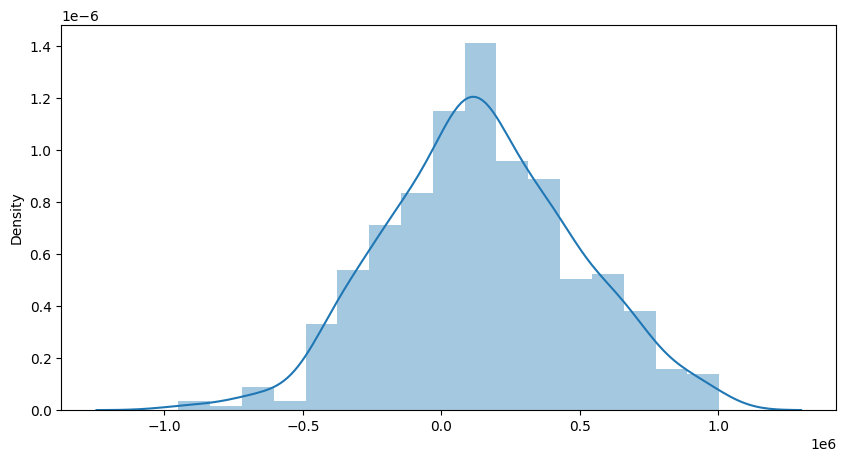

In [28]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

It represents that our mode is not skewed as the distribution is center aligned but note the values of the X and Y axis they in power of 6. Which means the difference between actual and predicted value was high and but it is reduced to some extent. Which is Good.

## **Model Evaluation**

# **Linear Regression**

In [29]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 10324589581.306395
Root Mean Squared Error: 101609.98760607342


In [29]:
# Linear Regression Model
# ------------------------------------------------------------
# Mean Squared Error: 10100187858.864885
# Root Mean Squared Error: 100499.69083964829


# 10170939558

In [30]:
s = 10100187858 - 9839952411
print(s)

260235447


In [31]:
y_train.shape

(4500,)

# **Decision Tree**

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  31428841630.51461


#**Random Forest**

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  14581610583.42323


# **Gradient Boosting Regression**

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  12018423991.425472


In [35]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 9839952411.801708,
    "Descison Tree": 29698988724.82603,
    "Random Forest":14315329749.65445,
    "Gradient Boosting": 12029643835.717766
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (lower values are better):
1. Linear Regression: 9839952411.801708
2. Gradient Boosting: 12029643835.717766
3. Random Forest: 14315329749.65445
4. Descison Tree: 29698988724.82603
